In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [2]:
# Data Load
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Data preprocessing
# data norm
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [4]:
# data flatten
print('flatten 전 shape : ', x_train.shape, x_test.shape)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print('flatten 후 shape : ', x_train.shape, x_test.shape)

flatten 전 shape :  (60000, 28, 28) (10000, 28, 28)
flatten 후 shape :  (60000, 784) (10000, 784)


In [6]:
# model
input_img = Input(shape=(784, ))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation = 'relu')(encoded)
encoded = Dense(32, activation = 'relu')(encoded)

decoded = Dense(64, activation = 'relu')(encoded)
decoded = Dense(128, activation = 'relu')(decoded)
decoded = Dense(784, activation = 'relu')(decoded)

In [7]:
autoencoder = Model(inputs = input_img, outputs=decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               101136

In [8]:
encoder = Model(inputs = input_img, outputs = encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [11]:
autoencoder.fit(x_train, x_train, epochs=100,
                batch_size=128, shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/100
469/469 [==============================] - 10s 16ms/step - loss: 0.4164 - val_loss: 0.3652
Epoch 2/100
469/469 [==============================] - 7s 15ms/step - loss: 0.3159 - val_loss: 0.2999
Epoch 3/100
469/469 [==============================] - 8s 16ms/step - loss: 0.2904 - val_loss: 0.2824
Epoch 4/100
469/469 [==============================] - 7s 15ms/step - loss: 0.2825 - val_loss: 0.2865
Epoch 5/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2695 - val_loss: 0.2591
Epoch 6/100
469/469 [==============================] - 6s 13ms/step - loss: 0.2628 - val_loss: 0.2552
Epoch 7/100
469/469 [==============================] - 8s 16ms/step - loss: 0.2667 - val_loss: 0.2563
Epoch 8/100
469/469 [==============================] - 7s 15ms/step - loss: 0.2488 - val_loss: 0.2317
Epoch 9/100
469/469 [==============================] - 7s 16ms/step - loss: 0.2426 - val_loss: 0.2313
Epoch 10/100
469/469 [==============================] - 8s 16ms/step - loss: 0.24

313/313 [==============================] - 1s 2ms/step


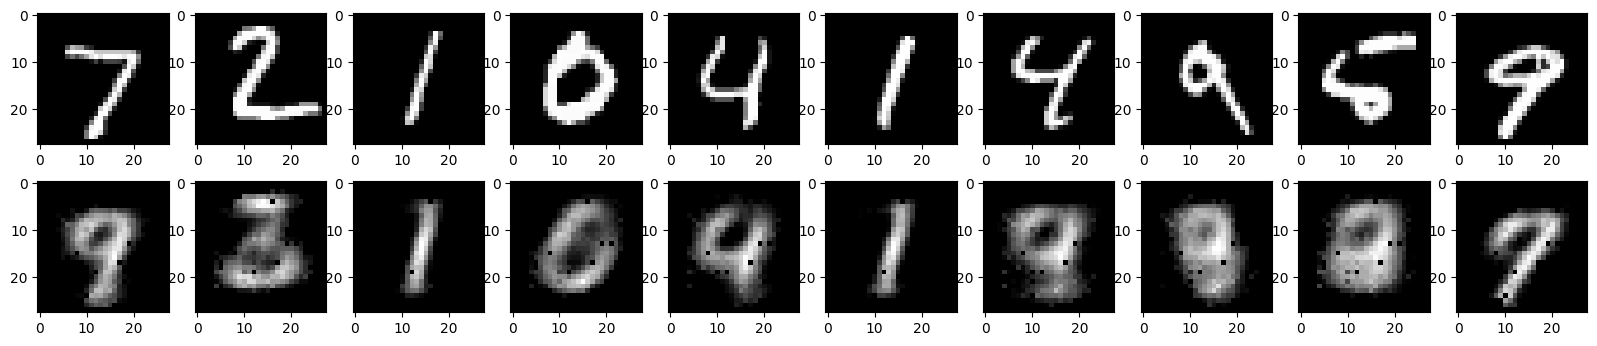

In [12]:
encoded_img = encoder.predict(x_test)
decoded_img = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_img[i].reshape(28, 28))
  plt.gray()
plt.show()

In [13]:
# stable diffusion
!pip install keras_cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 17.6 MB/s eta 0:00:00


In [14]:
import time
import keras_cv
from tensorflow import keras

Using TensorFlow backend


In [15]:
stable_model = keras_cv.models.StableDiffusion()

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [16]:
images = stable_model.text_to_image('Hatsune_miku')
images

 1/50 [..............................] - ETA: 3:11:42

KeyboardInterrupt: 

In [17]:
def plot_images(images):
  plt.figure(figsize=(20, 20))
  for i in range(len(images)):
    ax = plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

plot_images(images)

SyntaxError: incomplete input (<ipython-input-17-31a6254f92d5>, line 3)

In [ ]:
images = stable_model.text_to_image('Picasso stype cat photos')
plot_images(images)